**1. What is unsupervised learning in the context of machine learning?**

-->

Unsupervised learning is a type of machine learning where the algorithm learns patterns from data without labeled outputs. The goal is to discover hidden structures, groupings, or insights within the dataset. Common tasks include clustering and dimensionality reduction.

**2. How does K-Means clustering algorithm work?**

-->

K-Means is a centroid-based clustering algorithm that partitions data into k clusters.

**Steps:**

Choose the number of clusters k.

Initialize centroids randomly.

Assign each data point to the nearest centroid.

Recalculate centroids as the mean of assigned points.

Repeat steps 3–4 until centroids stabilize or the change is minimal.

**3. Explain the concept of a dendrogram in hierarchical clustering.**

-->

A dendrogram is a tree-like diagram that illustrates the merging or splitting of clusters in hierarchical clustering. It shows the order and distance at which clusters combine, helping determine the optimal number of clusters.

**4. What is the main difference between K-Means and Hierarchical Clustering?**

| K-Means                 | Hierarchical Clustering               |
| ----------------------- | ------------------------------------- |
| Requires predefined *k* | No need to specify clusters initially |
| Fast and scalable       | Slower for large datasets             |
| Produces flat clusters  | Produces a hierarchy/tree             |
| Not deterministic       | Deterministic                         |


**5. What are the advantages of DBSCAN over K-Means?**

*  Can find clusters of arbitrary shapes

* Automatically detects noise/outliers

* No need to specify the number of clusters beforehand

* Works well with datasets having different densities




**6. When would you use Silhouette Score in clustering?**

-->

Silhouette Score measures how similar an object is to its own cluster compared to others. It is used to evaluate clustering performance and determine the optimal number of clusters.

**7. What are the limitations of Hierarchical Clustering?**

-->

* Computationally expensive (O(n²))

* Not suitable for large datasets

* Sensitive to noise and outliers

* Once clusters merge, they cannot be undone

**8. Why is feature scaling important in clustering algorithms like K-Means?**

-->

Clustering depends on distance calculations. Without scaling, features with larger ranges dominate the distance metric, leading to incorrect cluster assignment.

**9. How does DBSCAN identify noise points?**

-->

DBSCAN marks a point as noise if:

* It has fewer than minPts neighbors within the radius eps

* It is not reachable from any core point

**10. Define inertia in the context of K-Means.**

-->

Inertia is the sum of squared distances between each point and its assigned cluster centroid. Lower inertia means better compact clusters.

**11. What is the elbow method in K-Means clustering?**

-->

A technique to determine optimal k by plotting inertia vs k. The point where the curve starts bending like an “elbow” indicates the best number of clusters.

**12. Describe the concept of "density" in DBSCAN.**

-->

Density refers to the number of points within a given neighborhood. A region with many points within radius eps is considered dense and forms a cluster.

**13. Can hierarchical clustering be used on categorical data?**

-->

Yes, but only with appropriate distance measures such as Hamming distance or using encoding techniques. Traditional Euclidean-based linkage works only for numeric data.

**14. What does a negative Silhouette Score indicate?**

-->

A negative score means the point is incorrectly assigned to its cluster and belongs closer to another cluster — indicating poor clustering.

**15. Explain the term "linkage criteria" in hierarchical clustering**.

-->

Linkage criteria determine how the distance between clusters is calculated. Common types:

* Single linkage (minimum distance)

* Complete linkage (maximum distance)

* Average linkage (mean distance)

* Ward’s linkage (minimizes variance)

**16. Why might K-Means perform poorly on data with varying cluster sizes or densities?**

-->

K-Means assumes spherical, equally sized clusters. It struggles when clusters have irregular shapes, different densities, or varying sizes.

**17. What are the core parameters in DBSCAN, and how do they influence clustering?**

-->
| Parameter | Description                                   |
| --------- | --------------------------------------------- |
| *eps*     | Radius for neighborhood search                |
| *minPts*  | Minimum number of points to form a core point |

* Larger eps → larger clusters

* Higher minPts → more strict clustering, more noise

**18. How does K-Means++ improve upon standard K-Means initialization?**

-->

K-Means++ chooses initial centroids smartly by spreading them apart rather than random selection. This improves convergence speed and avoids poor clustering.

**19. What is agglomerative clustering?**

-->

Agglomerative clustering is a bottom-up hierarchical clustering method that starts with every point as an individual cluster and merges them step-by-step until one cluster remains.

**20. What makes Silhouette Score a better metric than just inertia for model evaluation?**

* Inertia only measures cluster compactness, not separation

* Silhouette Score considers both:

   1.  Cohesion (within-cluster distance)

   2.  Separation (distance to nearest cluster)

* Gives value between –1 to +1 for better interpretation

**21. Generate synthetic data with 4 centers using make_blobs and apply K-Means clustering. Visualize using a scatter plot**

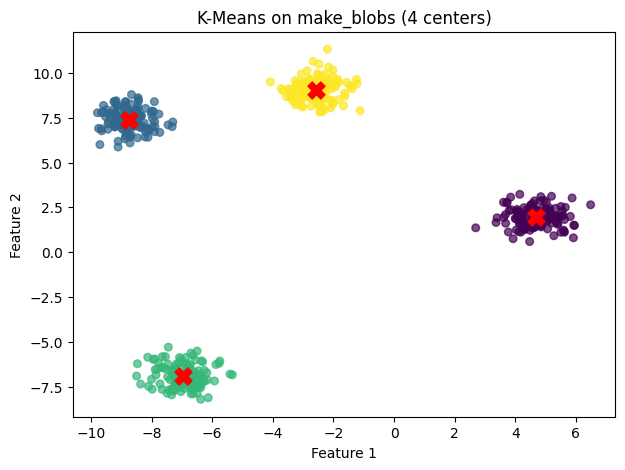

In [1]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, y_true = make_blobs(n_samples=500, centers=4, cluster_std=0.60, random_state=42)
kmeans = KMeans(n_clusters=4, random_state=42).fit(X)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

plt.figure(figsize=(7,5))
plt.scatter(X[:,0], X[:,1], c=labels, s=30, cmap='viridis', alpha=0.7)
plt.scatter(centers[:,0], centers[:,1], c='red', s=150, marker='X')
plt.title('K-Means on make_blobs (4 centers)')
plt.xlabel('Feature 1'); plt.ylabel('Feature 2')
plt.show()


**22. Load the Iris dataset and use Agglomerative Clustering to group the data into 3 clusters. Display the first 10 predicted labels**

In [2]:

from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

iris = load_iris()
X = iris.data
agg = AgglomerativeClustering(n_clusters=3, linkage='average')
pred = agg.fit_predict(X)
print("First 10 predicted labels:", pred[:10])


First 10 predicted labels: [1 1 1 1 1 1 1 1 1 1]


**23. Generate synthetic data using make_moons and apply DBSCAN. Highlight outliers in the plot**

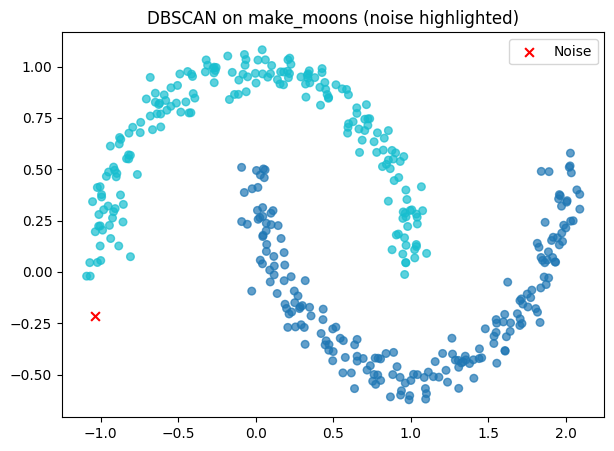

In [3]:

from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
import numpy as np

X, _ = make_moons(n_samples=400, noise=0.06, random_state=42)
db = DBSCAN(eps=0.15, min_samples=5).fit(X)
labels = db.labels_

# noise mask
noise_mask = (labels == -1)

plt.figure(figsize=(7,5))
plt.scatter(X[~noise_mask,0], X[~noise_mask,1], c=labels[~noise_mask], cmap='tab10', s=30, alpha=0.7)
plt.scatter(X[noise_mask,0], X[noise_mask,1], c='red', s=40, label='Noise', marker='x')
plt.title('DBSCAN on make_moons (noise highlighted)')
plt.legend()
plt.show()


**24. Load the Wine dataset and apply K-Means clustering after standardizing the features. Print the size of each cluster**

In [4]:

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

wine = load_wine()
X = wine.data
scaler = StandardScaler()
Xs = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42).fit(Xs)
labels = kmeans.labels_
unique, counts = np.unique(labels, return_counts=True)
print("Cluster sizes (label:count):", dict(zip(unique, counts)))


Cluster sizes (label:count): {np.int32(0): np.int64(65), np.int32(1): np.int64(51), np.int32(2): np.int64(62)}


**25. Use make_circles to generate synthetic data and cluster it using DBSCAN. Plot the result**

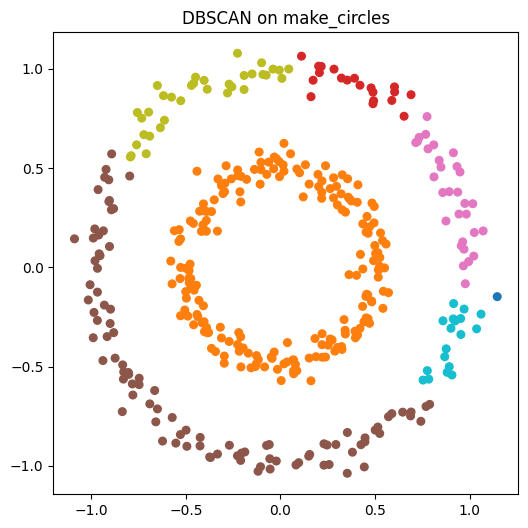

In [5]:

from sklearn.datasets import make_circles
from sklearn.cluster import DBSCAN

X, _ = make_circles(n_samples=400, factor=0.5, noise=0.05, random_state=42)
db = DBSCAN(eps=0.12, min_samples=5).fit(X)
labels = db.labels_

plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c=labels, cmap='tab10', s=30)
plt.title('DBSCAN on make_circles')
plt.show()


**26. Load the Breast Cancer dataset, apply MinMaxScaler, and use K-Means with 2 clusters. Output the cluster centroids**

In [6]:

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

data = load_breast_cancer()
X = data.data
scaler = MinMaxScaler()
Xs = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=2, random_state=42).fit(Xs)
centroids = kmeans.cluster_centers_
print("Centroids (2 clusters) shape:", centroids.shape)
print(centroids)


Centroids (2 clusters) shape: (2, 30)
[[0.50483563 0.39560329 0.50578661 0.36376576 0.46988732 0.42226302
  0.41838662 0.46928035 0.45899738 0.29945886 0.19093085 0.19112073
  0.17903433 0.13086432 0.18017962 0.25890126 0.12542475 0.30942779
  0.190072   0.13266975 0.48047448 0.45107371 0.4655302  0.31460597
  0.49868817 0.36391461 0.39027292 0.65827197 0.33752296 0.26041387]
 [0.25535358 0.28833455 0.24696416 0.14388369 0.35743076 0.18019471
  0.10344776 0.1306603  0.34011829 0.25591606 0.06427485 0.18843043
  0.05975663 0.02870108 0.18158628 0.13242941 0.05821528 0.18069336
  0.17221057 0.08403996 0.2052406  0.32069002 0.19242138 0.09943446
  0.3571115  0.14873935 0.13142287 0.26231363 0.22639412 0.15437354]]


**27. Generate synthetic data using make_blobs with varying cluster standard deviations and cluster with DBSCAN**

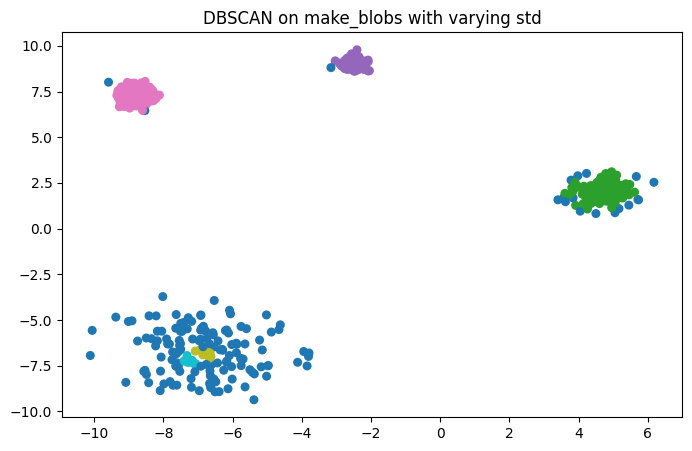

In [7]:

from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=600, centers=4, cluster_std=[0.2, 0.5, 1.2, 0.3], random_state=42)
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.3, min_samples=8).fit(X)
labels = db.labels_

plt.figure(figsize=(8,5))
plt.scatter(X[:,0], X[:,1], c=labels, cmap='tab10', s=30)
plt.title('DBSCAN on make_blobs with varying std')
plt.show()


**28. Load the Digits dataset, reduce it to 2D using PCA, and visualize clusters from K-Means**

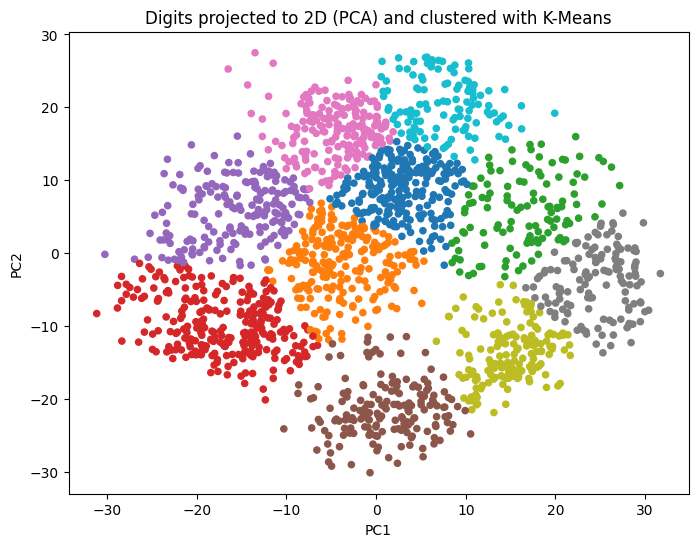

In [8]:

from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

digits = load_digits()
X = digits.data
pca = PCA(n_components=2, random_state=42)
X2 = pca.fit_transform(X)

kmeans = KMeans(n_clusters=10, random_state=42).fit(X2)
labels = kmeans.labels_

plt.figure(figsize=(8,6))
plt.scatter(X2[:,0], X2[:,1], c=labels, cmap='tab10', s=20)
plt.title('Digits projected to 2D (PCA) and clustered with K-Means')
plt.xlabel('PC1'); plt.ylabel('PC2')
plt.show()


**29. Create synthetic data using make_blobs and evaluate silhouette scores for k = 2 to 5. Display as a bar chart**

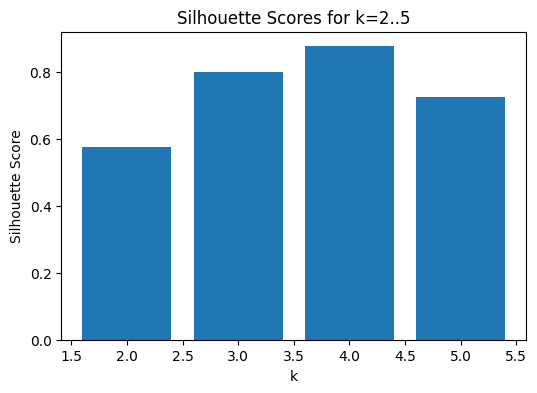

{2: np.float64(0.5762620877840752), 3: np.float64(0.7995592026332377), 4: np.float64(0.876354521706931), 5: np.float64(0.7236614920624375)}


In [9]:

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

X, _ = make_blobs(n_samples=400, centers=4, cluster_std=0.6, random_state=42)
scores = {}
for k in range(2,6):
    km = KMeans(n_clusters=k, random_state=42).fit(X)
    sc = silhouette_score(X, km.labels_)
    scores[k] = sc

plt.figure(figsize=(6,4))
plt.bar(list(scores.keys()), list(scores.values()))
plt.xlabel('k'); plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for k=2..5')
plt.show()
print(scores)


**30. Load the Iris dataset and use hierarchical clustering to group data. Plot a dendrogram with average linkage**

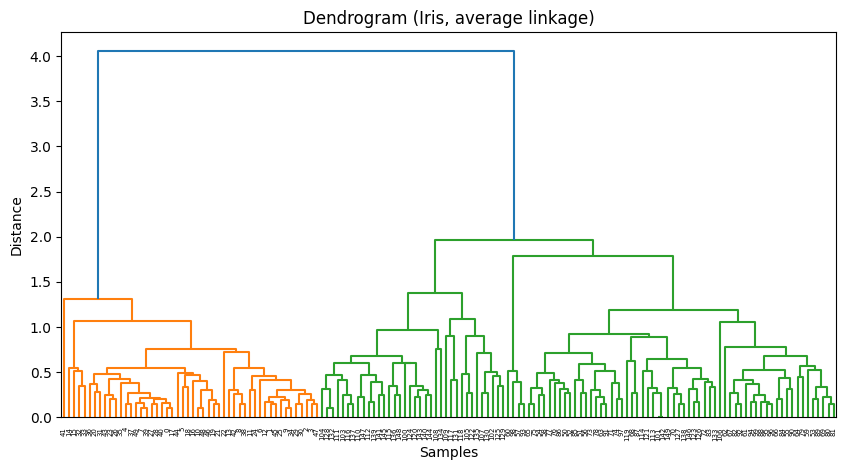

In [10]:

from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data
Z = linkage(X, method='average')  # average linkage
plt.figure(figsize=(10, 5))
dendrogram(Z, truncate_mode='level', p=30)
plt.title('Dendrogram (Iris, average linkage)')
plt.xlabel('Samples'); plt.ylabel('Distance')
plt.show()


**31. Generate synthetic data with overlapping clusters using make_blobs, then apply K-Means and visualize with decision boundaries**

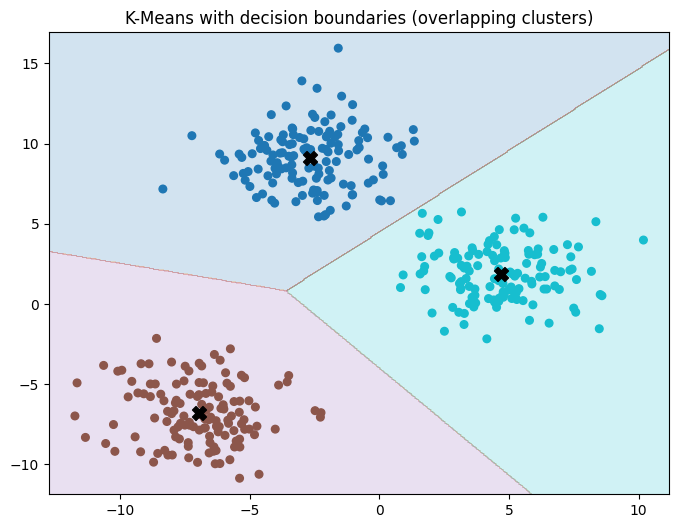

In [11]:

import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from matplotlib.colors import ListedColormap

X, _ = make_blobs(n_samples=400, centers=3, cluster_std=1.8, random_state=42)

kmeans = KMeans(n_clusters=3, random_state=42).fit(X)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# decision boundary mesh
h = 0.05
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.2, cmap='tab10')
plt.scatter(X[:,0], X[:,1], c=labels, s=30, cmap='tab10')
plt.scatter(centers[:,0], centers[:,1], c='black', s=100, marker='X')
plt.title('K-Means with decision boundaries (overlapping clusters)')
plt.show()


**32. Load the Digits dataset and apply DBSCAN after reducing dimensions with t-SNE. Visualize the results**

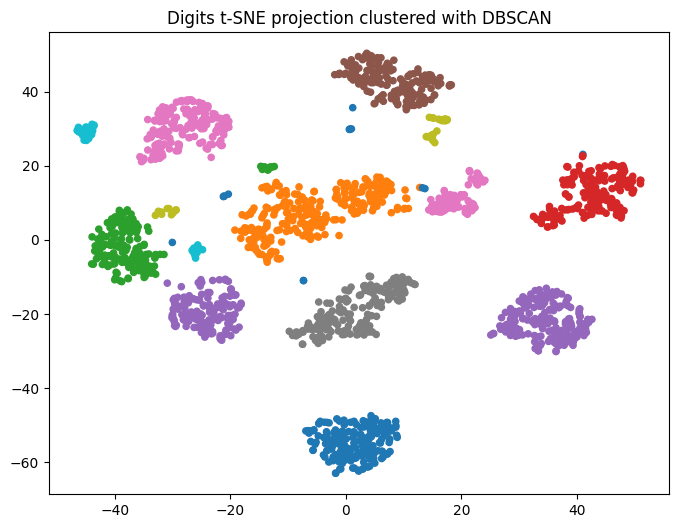

In [12]:

from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

digits = load_digits()
X = digits.data
X_tsne = TSNE(n_components=2, random_state=42, perplexity=30).fit_transform(X)

db = DBSCAN(eps=3.0, min_samples=5).fit(X_tsne)
labels = db.labels_

plt.figure(figsize=(8,6))
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=labels, cmap='tab10', s=20)
plt.title('Digits t-SNE projection clustered with DBSCAN')
plt.show()


**33. Generate synthetic data using make_blobs and apply Agglomerative Clustering with complete linkage. Plot the result**

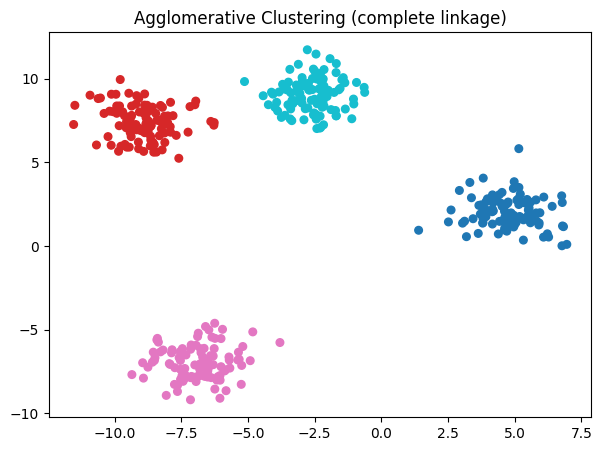

In [13]:

from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

X, _ = make_blobs(n_samples=400, centers=4, random_state=42)
agg = AgglomerativeClustering(n_clusters=4, linkage='complete').fit(X)
labels = agg.labels_

plt.figure(figsize=(7,5))
plt.scatter(X[:,0], X[:,1], c=labels, cmap='tab10', s=30)
plt.title('Agglomerative Clustering (complete linkage)')
plt.show()


**34. Load the Breast Cancer dataset and compare inertia values for K = 2 to 6 using K-Means. Show results in a line plot**

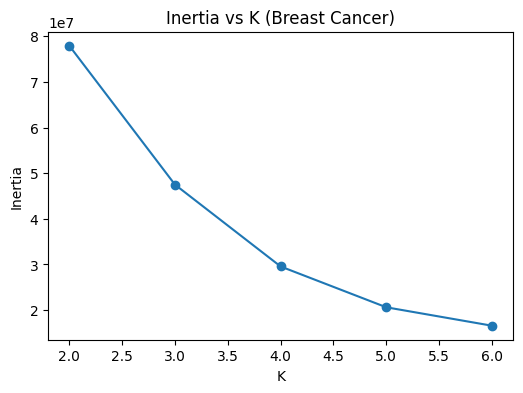

{2: 77943099.87829883, 3: 47499852.22561669, 4: 29555736.330222223, 5: 20612895.82398181, 6: 16573867.019209417}


In [14]:

from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

data = load_breast_cancer()
X = data.data

inertias = []
Ks = list(range(2,7))
for k in Ks:
    km = KMeans(n_clusters=k, random_state=42).fit(X)
    inertias.append(km.inertia_)

plt.figure(figsize=(6,4))
plt.plot(Ks, inertias, marker='o')
plt.xlabel('K'); plt.ylabel('Inertia'); plt.title('Inertia vs K (Breast Cancer)')
plt.show()
print(dict(zip(Ks, inertias)))


**35. Generate synthetic concentric circles using make_circles and cluster using Agglomerative Clustering with single linkage**

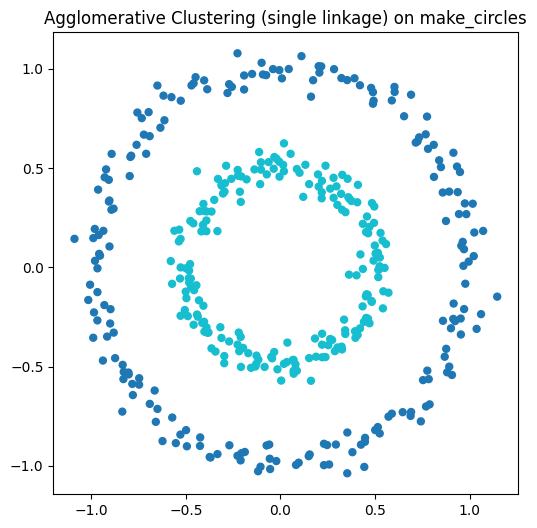

In [15]:

from sklearn.datasets import make_circles
from sklearn.cluster import AgglomerativeClustering

X, _ = make_circles(n_samples=400, factor=0.5, noise=0.05, random_state=42)
agg = AgglomerativeClustering(n_clusters=2, linkage='single').fit(X)
labels = agg.labels_

plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c=labels, cmap='tab10', s=25)
plt.title('Agglomerative Clustering (single linkage) on make_circles')
plt.show()


**36. Use the Wine dataset, apply DBSCAN after scaling the data, and count the number of clusters (excluding noise)**

In [16]:

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

wine = load_wine()
X = wine.data
scaler = StandardScaler()
Xs = scaler.fit_transform(X)

db = DBSCAN(eps=0.9, min_samples=5).fit(Xs)
labels = db.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print("Number of clusters (excluding noise):", n_clusters)
print("Number of noise points:", np.sum(labels == -1))


Number of clusters (excluding noise): 0
Number of noise points: 178


**37. Generate synthetic data with make_blobs and apply KMeans. Then plot the cluster centers on top of the data points**

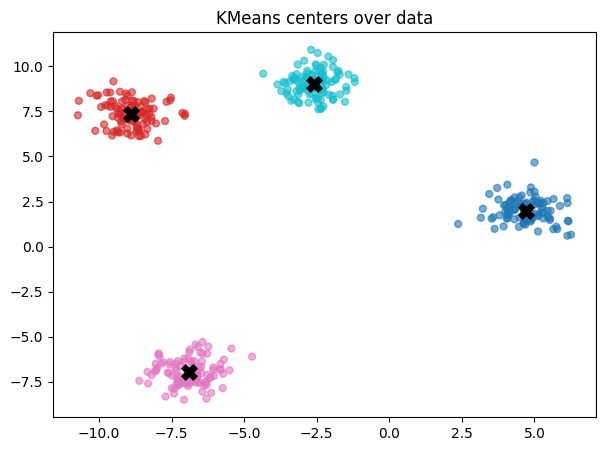

In [17]:

X, _ = make_blobs(n_samples=400, centers=4, cluster_std=0.7, random_state=42)
km = KMeans(n_clusters=4, random_state=42).fit(X)
labels = km.labels_
centers = km.cluster_centers_

plt.figure(figsize=(7,5))
plt.scatter(X[:,0], X[:,1], c=labels, s=25, cmap='tab10', alpha=0.6)
plt.scatter(centers[:,0], centers[:,1], c='black', s=120, marker='X')
plt.title('KMeans centers over data')
plt.show()


**38. Load the Iris dataset, cluster with DBSCAN, and print how many samples were identified as noise**

In [18]:

from sklearn.datasets import load_iris
from sklearn.cluster import DBSCAN
import numpy as np

iris = load_iris()
X = iris.data
db = DBSCAN(eps=0.6, min_samples=5).fit(X)
labels = db.labels_
noise_count = np.sum(labels == -1)
print("Number of noise samples in Iris (DBSCAN):", int(noise_count))


Number of noise samples in Iris (DBSCAN): 9


**39. Generate synthetic non-linearly separable data using make_moons, apply K-Means, and visualize the clustering result**

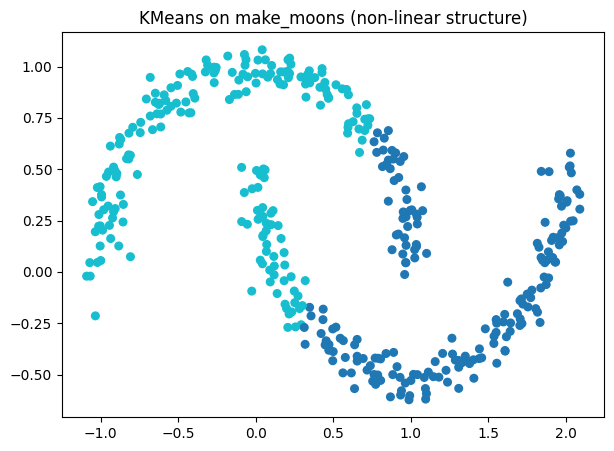

In [19]:

X, _ = make_moons(n_samples=400, noise=0.06, random_state=42)
km = KMeans(n_clusters=2, random_state=42).fit(X)
labels = km.labels_

plt.figure(figsize=(7,5))
plt.scatter(X[:,0], X[:,1], c=labels, cmap='tab10', s=30)
plt.title('KMeans on make_moons (non-linear structure)')
plt.show()


**40. Load the Digits dataset, apply PCA to reduce to 3 components, then use KMeans and visualize with a 3D scatter plot**

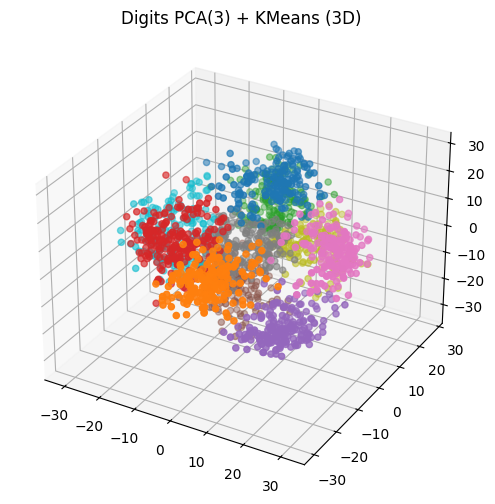

In [20]:

from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

digits = load_digits()
X = digits.data
pca = PCA(n_components=3, random_state=42)
X3 = pca.fit_transform(X)

km = KMeans(n_clusters=10, random_state=42).fit(X3)
labels = km.labels_

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X3[:,0], X3[:,1], X3[:,2], c=labels, s=20, cmap='tab10')
ax.set_title('Digits PCA(3) + KMeans (3D)')
plt.show()


**41. Generate synthetic blobs with 5 centers and apply KMeans. Then use silhouette_score to evaluate the clustering**

In [21]:

from sklearn.metrics import silhouette_score

X, _ = make_blobs(n_samples=500, centers=5, cluster_std=0.6, random_state=42)
km = KMeans(n_clusters=5, random_state=42).fit(X)
labels = km.labels_
sc = silhouette_score(X, labels)
print("Silhouette Score (k=5):", sc)


Silhouette Score (k=5): 0.7993257411585863


**42. Load the Breast Cancer dataset, reduce dimensionality using PCA, and apply Agglomerative Clustering. Visualize in 2D**

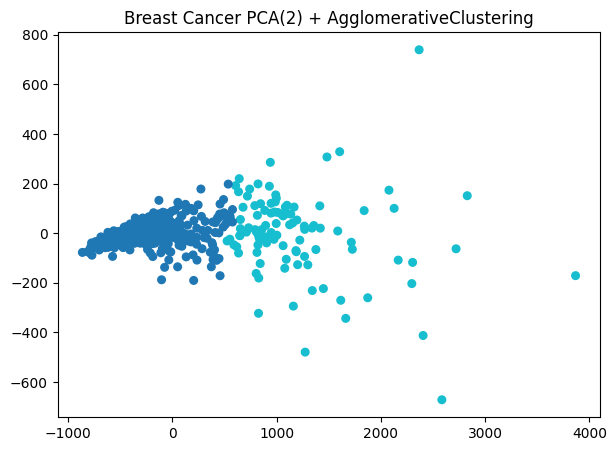

In [22]:

from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

data = load_breast_cancer()
X = data.data
pca = PCA(n_components=2, random_state=42)
X2 = pca.fit_transform(X)

agg = AgglomerativeClustering(n_clusters=2).fit(X2)
labels = agg.labels_

plt.figure(figsize=(7,5))
plt.scatter(X2[:,0], X2[:,1], c=labels, cmap='tab10', s=30)
plt.title('Breast Cancer PCA(2) + AgglomerativeClustering')
plt.show()


**43. Generate noisy circular data using make_circles and visualize clustering results from KMeans and DBSCAN side-by-side**

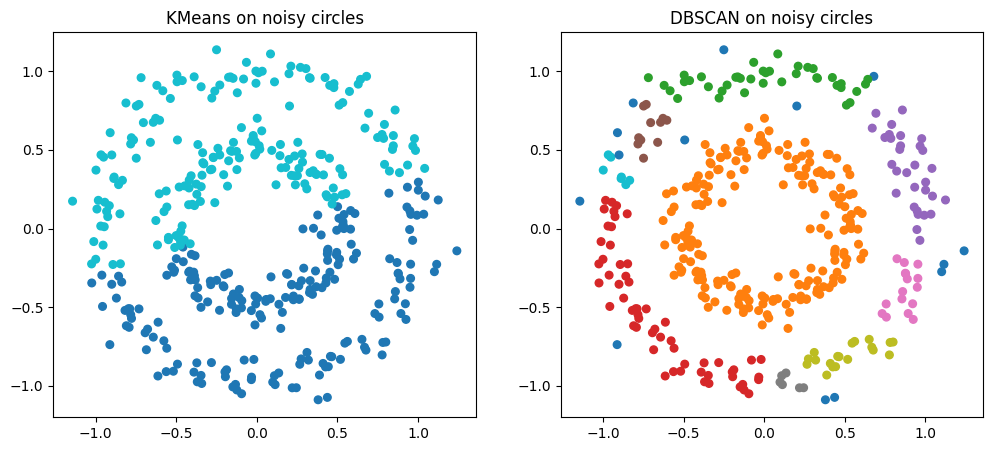

In [23]:

from sklearn.cluster import KMeans, DBSCAN
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

X, _ = make_circles(n_samples=400, factor=0.5, noise=0.08, random_state=42)

km = KMeans(n_clusters=2, random_state=42).fit(X)
db = DBSCAN(eps=0.13, min_samples=5).fit(X)

fig, axes = plt.subplots(1,2, figsize=(12,5))
axes[0].scatter(X[:,0], X[:,1], c=km.labels_, cmap='tab10', s=30)
axes[0].set_title('KMeans on noisy circles')
axes[1].scatter(X[:,0], X[:,1], c=db.labels_, cmap='tab10', s=30)
axes[1].set_title('DBSCAN on noisy circles')
plt.show()


**44. Load the Iris dataset and plot the Silhouette Coefficient for each sample after KMeans clustering**

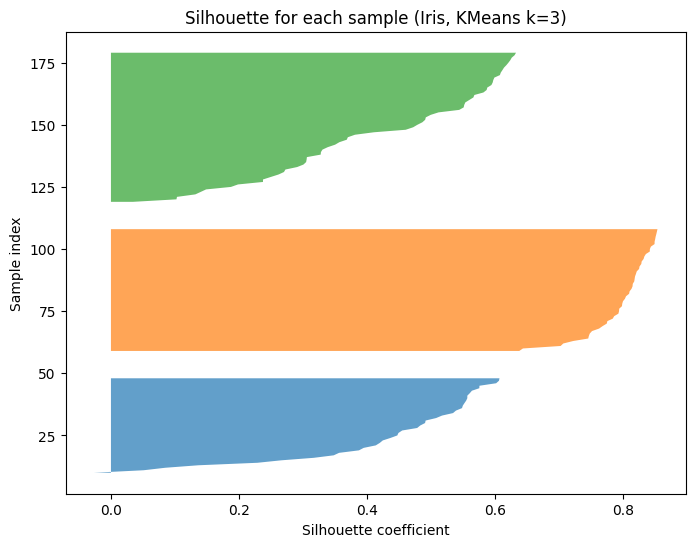

Average silhouette score: 0.551191604619592


In [24]:

from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
kmeans = KMeans(n_clusters=3, random_state=42).fit(X)
labels = kmeans.labels_
sil_vals = silhouette_samples(X, labels)

plt.figure(figsize=(8,6))
y_lower = 10
for i in range(3):
    ith_sil = sil_vals[labels == i]
    ith_sil.sort()
    y_upper = y_lower + ith_sil.shape[0]
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_sil, alpha=0.7)
    y_lower = y_upper + 10
plt.xlabel('Silhouette coefficient')
plt.ylabel('Sample index')
plt.title('Silhouette for each sample (Iris, KMeans k=3)')
plt.show()
print("Average silhouette score:", silhouette_score(X, labels))


**45. Generate synthetic data using make_blobs and apply Agglomerative Clustering with 'average' linkage. Visualize clusters**

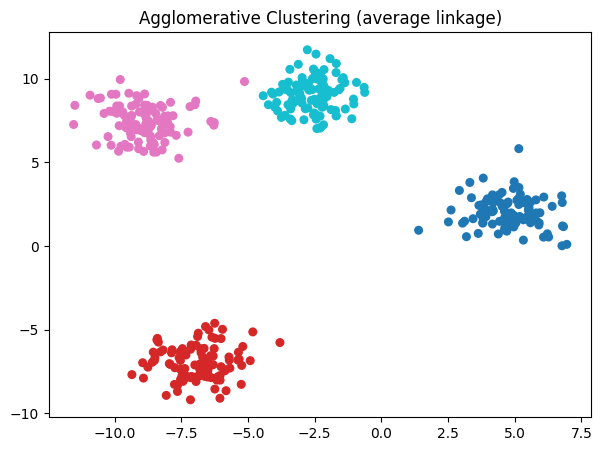

In [25]:

X, _ = make_blobs(n_samples=400, centers=4, random_state=42)
agg = AgglomerativeClustering(n_clusters=4, linkage='average').fit(X)
labels = agg.labels_

plt.figure(figsize=(7,5))
plt.scatter(X[:,0], X[:,1], c=labels, cmap='tab10', s=30)
plt.title('Agglomerative Clustering (average linkage)')
plt.show()


**46. Load the Wine dataset, apply KMeans, and visualize the cluster assignments in a seaborn pairplot (first 4 features)**

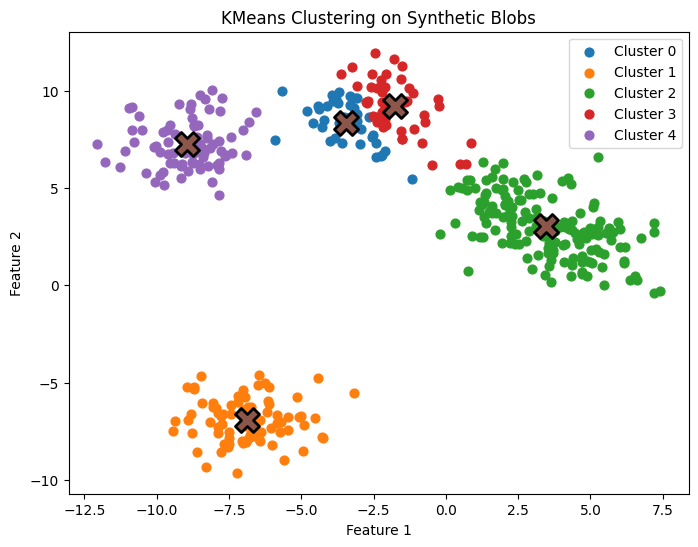

Silhouette Score: 0.5898850871810457


In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd

# Generate synthetic blobs
X, y_true = make_blobs(n_samples=400, centers=5, cluster_std=1.2, random_state=42)

# Apply KMeans
km = KMeans(n_clusters=5, random_state=42)
km.fit(X)

# Create dataframe properly
df_sub = pd.DataFrame(X, columns=['x','y']).copy()
df_sub.loc[:, 'cluster'] = km.labels_

# Plot clusters
plt.figure(figsize=(8,6))
for cluster_id in range(5):
    plt.scatter(df_sub[df_sub.cluster == cluster_id]['x'],
                df_sub[df_sub.cluster == cluster_id]['y'],
                label=f"Cluster {cluster_id}", s=40)

# Plot cluster centers
centers = km.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], marker='X', s=300, edgecolor='black', linewidths=2)

plt.title("KMeans Clustering on Synthetic Blobs")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

# Silhouette Score
score = silhouette_score(X, km.labels_)
print("Silhouette Score:", score)


**47. Generate noisy blobs using make_blobs and use DBSCAN to identify both clusters and noise points. Print the count**

In [28]:

X, _ = make_blobs(n_samples=500, centers=4, cluster_std=1.5, random_state=42)
from sklearn.cluster import DBSCAN
import numpy as np

db = DBSCAN(eps=0.9, min_samples=6).fit(X)
labels = db.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = np.sum(labels == -1)
print("Clusters found (excluding noise):", n_clusters)
print("Noise points count:", int(n_noise))


Clusters found (excluding noise): 4
Noise points count: 53


**48. Load the Digits dataset, reduce dimensions using t-SNE, then apply Agglomerative Clustering and plot the clusters**

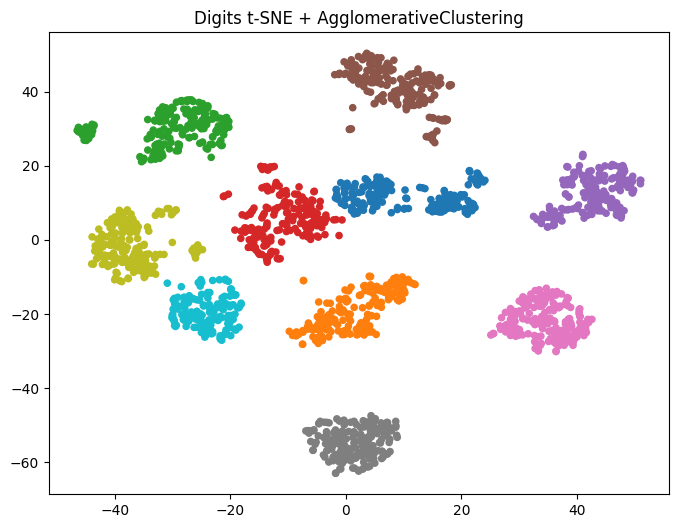

In [29]:

from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

digits = load_digits()
X = digits.data
X_tsne = TSNE(n_components=2, random_state=42, perplexity=30).fit_transform(X)

agg = AgglomerativeClustering(n_clusters=10).fit(X_tsne)
labels = agg.labels_

plt.figure(figsize=(8,6))
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=labels, cmap='tab10', s=20)
plt.title('Digits t-SNE + AgglomerativeClustering')
plt.show()
